### Algerian Forest Fire Logistic Regression
- Data Ingestion
- EDA
- Preprocessing
- Model Building
- Performance Metrices

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
df=pd.read_csv('Algerian_Forest_Fire.csv',header=1)

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
df.isna().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [5]:
df.shape

(246, 14)

In [6]:
df[120:126]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire


In [7]:
df.drop(df.iloc[122:124].index,axis=0,inplace=True)

In [8]:
df.isna().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
dtype: int64

In [9]:
df.shape

(244, 14)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4    RH          244 non-null    object
 5    Ws          244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
dtypes: object(14)
memory usage: 28.6+ KB


In [11]:
df.dtypes

day            object
month          object
year           object
Temperature    object
 RH            object
 Ws            object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
dtype: object

In [12]:
def type_Description(df):
    temp=pd.DataFrame(index=df.columns)
    temp['datatype']=df.dtypes
    temp['unique_values']=df.nunique()
    temp['null_values']=df.isna().sum()
    temp['duplicated_values']=df.duplicated().sum()
    return temp

In [13]:
type_Description(df)

,datatype,unique_values,null_values,duplicated_values
day,object,31,0,0
month,object,4,0,0
year,object,1,0,0
Temperature,object,19,0,0
RH,object,62,0,0
Ws,object,18,0,0
Rain,object,39,0,0
FFMC,object,173,0,0
DMC,object,166,0,0
DC,object,198,0,0


In [14]:
df.columns=df.columns.str.replace(' ','')

In [15]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [16]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', nan, 'not fire    '], dtype=object)

In [17]:
df['Classes']=df['Classes'].str.strip()

In [18]:
df['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

In [19]:
float_var=['Rain','FFMC','DMC','DC','ISI','BUI','FWI']

In [20]:
num_var=['day','month','year','Temperature','RH','Ws']

In [21]:
def convert_to_int():
    for col in float_var:
        df[col] = df[col].apply(pd.to_numeric, downcast='float', errors='coerce')
    for col in num_var:
        df[col]=df[col].astype('int')

In [22]:
convert_to_int()

In [23]:
type_Description(df)

,datatype,unique_values,null_values,duplicated_values
day,int32,31,0,0
month,int32,4,0,0
year,int32,1,0,0
Temperature,int32,19,0,0
RH,int32,62,0,0
Ws,int32,18,0,0
Rain,float32,39,0,0
FFMC,float32,173,0,0
DMC,float32,166,0,0
DC,float32,197,1,0


In [24]:
data=df.copy()

In [25]:
### Storing All the numerical variable in num_col
num_col=data[data.dtypes[(data.dtypes=='int') | (data.dtypes=='float')|(data.dtypes=='float32')].index]

In [26]:
### Describing the stastical analysis of the data 
num_col.describe().T

,count,mean,std,min,25%,50%,75%,max
day,244.0,15.754098,8.825059,1.0,8.000000,16.000000,23.000000,31.000000
month,244.0,7.500000,1.112961,6.0,7.000000,7.500000,8.000000,9.000000
year,244.0,2012.000000,0.000000,2012.0,2012.000000,2012.000000,2012.000000,2012.000000
Temperature,244.0,32.172131,3.633843,22.0,30.000000,32.000000,35.000000,42.000000
RH,244.0,61.938525,14.884200,21.0,52.000000,63.000000,73.250000,90.000000
Ws,244.0,15.504098,2.810178,6.0,14.000000,15.000000,17.000000,29.000000
Rain,244.0,0.760656,1.999407,0.0,0.000000,0.000000,0.500000,16.799999
FFMC,244.0,77.887680,14.337568,28.6,72.075003,83.500000,88.300003,96.000000
DMC,244.0,14.673360,12.368040,0.7,5.800000,11.300000,20.750000,65.900002
DC,243.0,49.430847,47.665600,6.9,12.350000,33.099998,69.099998,220.399994


In [27]:
# Observation
# 1. Rain Feature is highly skewed on the right 
# 2. year feature is not required as it has only one unique value through out the dataset 
# 3. Rain Features has some outliers
# 4. BUI also right skewed and has some outliers

In [28]:
### Unique values in the year featue
num_col['year'].unique()

array([2012])

In [29]:
# Observation:
# - As there is only one year it has been analysed for both the regions 
#   it can be dropped from the dataset

In [30]:
### Droping the year feature
data.drop(labels=['year'],axis=1,inplace=True)

In [31]:
data.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,29,57,18,0.0,65.699997,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,29,61,13,1.3,64.400002,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,26,82,22,13.1,47.099998,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,25,89,13,2.5,28.600000,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,27,77,16,0.0,64.800003,3.0,14.2,1.2,3.9,0.5,not fire


In [32]:
data.corr()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
day,1.000000e+00,2.232788e-17,0.095772,-0.074209,0.047001,-0.112265,0.224032,0.491571,0.527952,0.177727,0.517229,0.350781
month,2.232788e-17,1.000000e+00,-0.059017,-0.037884,-0.041447,0.035322,0.015577,0.068178,0.126511,0.061680,0.085822,0.082639
Temperature,9.577222e-02,-5.901677e-02,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.376284,0.607551,0.455504,0.566670
RH,-7.420934e-02,-3.788419e-02,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.226941,-0.690637,-0.348587,-0.580957
Ws,4.700086e-02,-4.144673e-02,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.079135,0.015248,0.029756,0.032368
Rain,-1.122654e-01,3.532207e-02,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.298023,-0.347105,-0.299171,-0.324422
FFMC,2.240321e-01,1.557669e-02,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.507397,0.739730,0.589652,0.691132
DMC,4.915710e-01,6.817778e-02,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875925,0.674499,0.982073,0.875864
DC,5.279524e-01,1.265111e-01,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521
ISI,1.777266e-01,6.168012e-02,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.508643,1.000000,0.635891,0.922895


Observation:
- Temperature and Fine Fuel Moisture Code (FFMC) are Positively Correlated .
- Temperature and Relative Humidity (RH) are Negatively Correlated .
- Temperature and Initial Spread Index (ISI) are Positively Correlated .
- Buildup Index (BUI) and Duff Moisture Code (DMC) are highly Correlated but both of them are independent variable 
  which leads to MultiCollinearity Which should be handled
-  Drought Code (DC) and Buildup Index (BUI) are also highly Correlated they also make MultiCollinearity

In [33]:
type_Description(data)

,datatype,unique_values,null_values,duplicated_values
day,int32,31,0,0
month,int32,4,0,0
Temperature,int32,19,0,0
RH,int32,62,0,0
Ws,int32,18,0,0
Rain,float32,39,0,0
FFMC,float32,173,0,0
DMC,float32,166,0,0
DC,float32,197,1,0
ISI,float32,106,0,0


In [34]:
Class_mode=df['Classes'].mode()[0]

In [35]:
Class_mode

'fire'

In [36]:
data[data['Classes'].isnull()]

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
167,14,7,37,37,18,0.2,88.900002,12.9,NaN,12.5,10.4,NaN,NaN


In [37]:
data['Classes'].fillna(data['Classes'].mode()[0],inplace=True)
data['FWI'].fillna(data['FWI'].median(),inplace=True)
data['DC'].fillna(data['DC'].median(),inplace=True)

In [38]:
type_Description(data)

,datatype,unique_values,null_values,duplicated_values
day,int32,31,0,0
month,int32,4,0,0
Temperature,int32,19,0,0
RH,int32,62,0,0
Ws,int32,18,0,0
Rain,float32,39,0,0
FFMC,float32,173,0,0
DMC,float32,166,0,0
DC,float32,197,0,0
ISI,float32,106,0,0


In [39]:
## What is Maximum Temperature When the Fire has happened

In [40]:
data.groupby('Classes')['Temperature'].max()

Classes
fire        42
not fire    39
Name: Temperature, dtype: int32

In [41]:
##Observation: The maximum temperature was around 42 degree celsius

In [42]:
## What was the Average Relative Humidity when the Fire happened where the Temperature was over 38 degree

In [43]:
data[(data['Classes']=='fire') & (data['Temperature']>38)]['RH'].mean()

34.55555555555556

In [44]:
##Observation: The average Humidity was around 34%

In [45]:
# Display all Average Temperature of month where the fire had happened

In [46]:
data[data['Classes']=='fire'].groupby(['month'])['Temperature'].mean()

month
6    32.440000
7    33.923077
8    35.647059
9    31.086957
Name: Temperature, dtype: float64

In [47]:
# Display all the details of the list where the fire has happened with maximum temperature

In [48]:
data[(data['Classes']=='fire') & (data['Temperature']==max(data['Temperature']))]

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
201,17,8,42,24,9,0.0,96.0,30.299999,76.400002,15.7,30.4,24.0,fire


In [49]:
# Display the Average Realtive Humidity for each month where temperature was more than 38 degree

In [50]:
data[data['Temperature']>38].groupby('month')['RH'].mean()

month
7    54.50
8    33.25
Name: RH, dtype: float64

In [51]:
# Display the skewness of the dataset

In [52]:
data.skew()

C:\Users\prasa\AppData\Local\Temp\ipykernel_19028\1188251951.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


day            0.002806
month          0.000000
Temperature   -0.196309
RH            -0.237964
Ws             0.545881
Rain           4.579071
FFMC          -1.325633
DMC            1.527652
DC             1.479469
ISI            1.121975
BUI            1.459069
FWI            1.153394
dtype: float64

In [53]:
# Observation: It seems that the rain is highly positive skewed has more outliers

In [54]:
# What is the Ram Space used by the dataset

In [55]:
data.memory_usage()

Index          1952
day             976
month           976
Temperature     976
RH              976
Ws              976
Rain            976
FFMC            976
DMC             976
DC              976
ISI             976
BUI             976
FWI             976
Classes        1952
dtype: int64

In [56]:
# What is the Temperature when Fire Weather Index was maximum

In [57]:
data[data['FWI']==max(data['FWI'])]

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
209,25,8,34,40,18,0.0,92.099998,56.299999,157.5,14.3,59.5,31.1,fire


In [58]:
# What is the Temperature when Fine Fuel Moisture Code was maximum

In [59]:
data[data['FFMC']==max(data['FFMC'])]

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
201,17,8,42,24,9,0.0,96.0,30.299999,76.400002,15.7,30.4,24.0,fire


In [60]:
# Covariance between Dependent and Independent Features

In [61]:
data.cov()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
day,7.788167e+01,4.641920e-16,3.071308,-9.747689,1.165621,-1.980908,28.346758,53.654328,221.726486,6.548769,64.839034,23.004634
month,4.641920e-16,1.238683e+00,-0.238683,-0.627572,-0.129630,0.078601,0.248560,0.938477,6.728395,0.286626,1.356790,0.688477
Temperature,3.071308e+00,-2.386831e-01,13.204817,-35.396782,-2.840215,-2.374270,35.297598,21.712423,64.479485,9.218043,23.512265,15.177784
RH,-9.747689e+00,-6.275720e-01,-35.396782,221.539415,9.874739,6.635431,-137.785531,-74.580245,-158.064367,-42.920524,-73.700941,-63.542154
Ws,1.165621e+00,-1.296296e-01,-2.840215,9.874739,7.897102,0.956129,-6.577727,-0.043306,10.393153,0.178913,1.187799,0.645170
Rain,-1.980908e+00,7.860082e-02,-2.374270,6.635431,0.956129,3.997623,-15.595918,-7.135415,-28.301672,-2.897687,-8.496825,-4.809061
FFMC,2.834676e+01,2.485597e-01,35.297598,-137.785531,-6.577727,-15.595918,205.565937,106.820534,344.883087,44.283138,120.090016,73.359634
DMC,5.365433e+01,9.384774e-01,21.712423,-74.580245,-0.043306,-7.135415,106.820534,152.968382,515.417595,34.831449,172.536342,80.452857
DC,2.217265e+02,6.728395e+00,64.479485,-158.064367,10.393153,-28.301672,344.883087,515.417595,2263.753177,99.784826,636.654487,261.388184
ISI,6.548769e+00,2.866255e-01,9.218043,-42.920524,0.178913,-2.897687,44.283138,34.831449,99.784826,17.433281,37.714477,28.319011


In [62]:
data.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,29,57,18,0.0,65.699997,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,29,61,13,1.3,64.400002,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,26,82,22,13.1,47.099998,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,25,89,13,2.5,28.600000,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,27,77,16,0.0,64.800003,3.0,14.2,1.2,3.9,0.5,not fire


C:\Users\prasa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\prasa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\prasa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

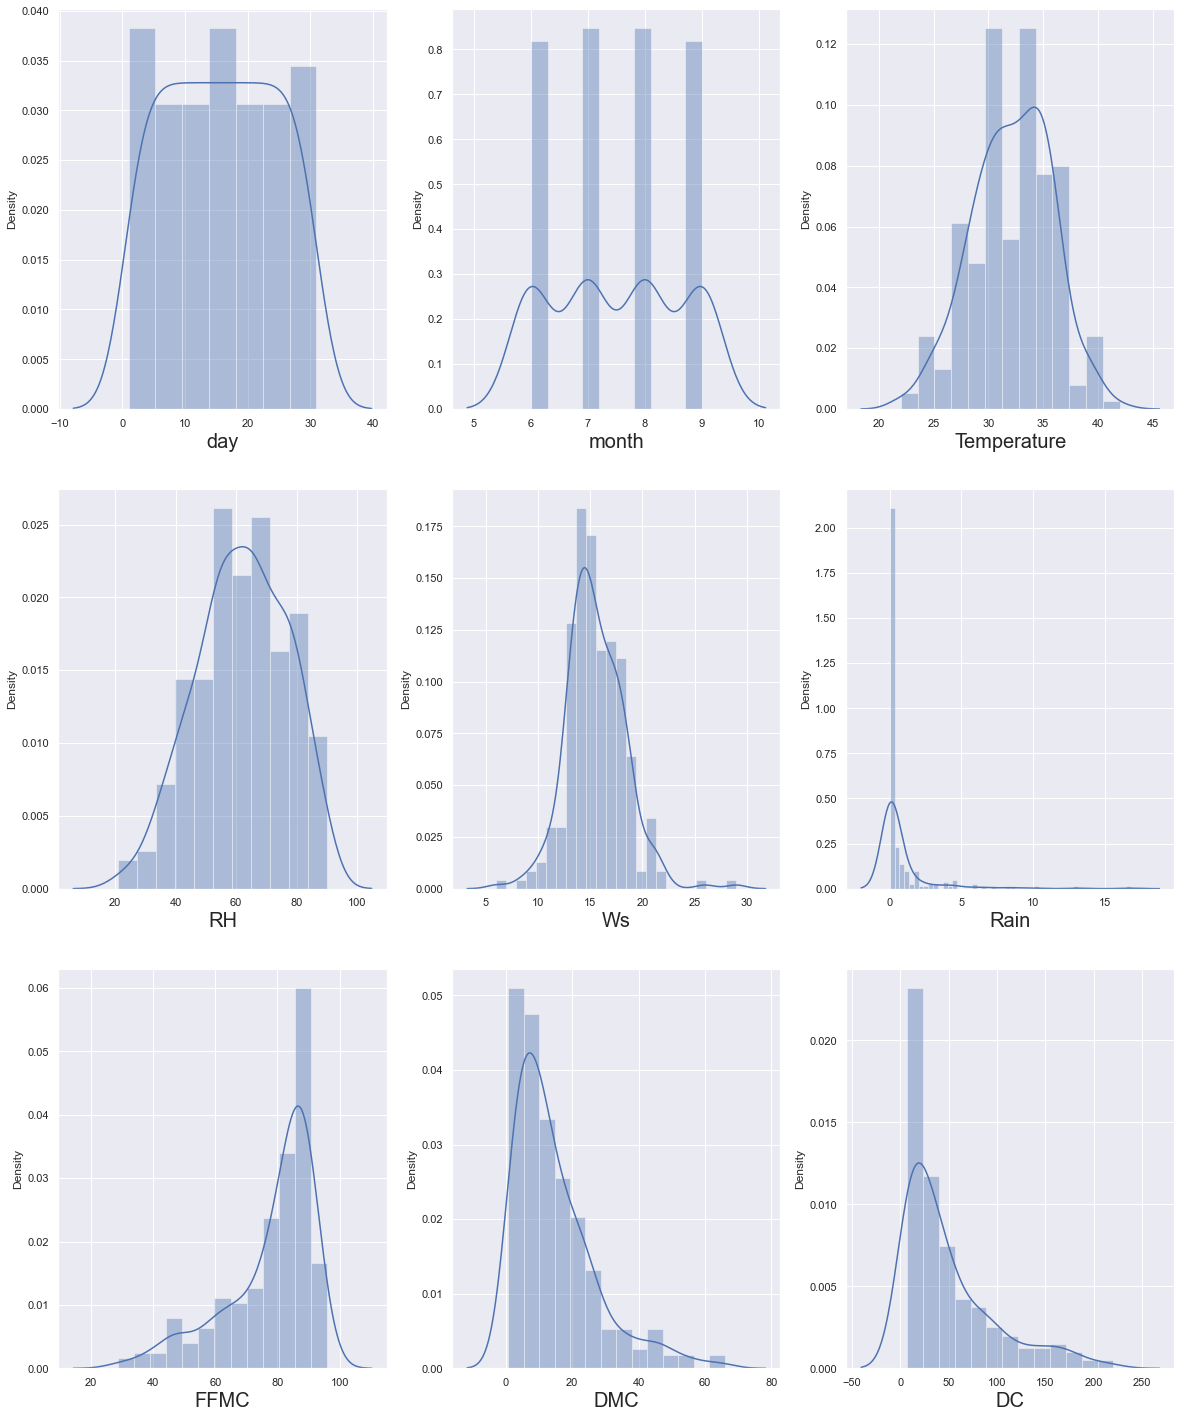

In [63]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

<AxesSubplot:>

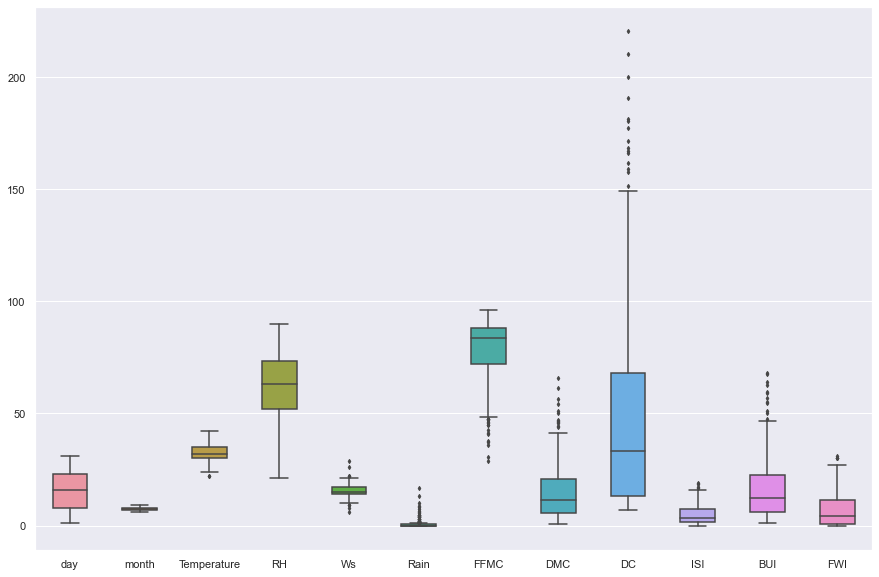

In [64]:

fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

In [65]:
q=data['Rain'].quantile(0.95)
data_cleaned=data[data['Rain']<q]

In [66]:
q=data['Ws'].quantile(0.98)
data_cleaned=data[data['Ws']<q]

In [67]:
q=data['DMC'].quantile(0.98)
data_cleaned=data[data['DMC']<q]

In [68]:
q=data['DC'].quantile(0.98)
data_cleaned=data[data['DC']<q]

In [69]:
q=data['ISI'].quantile(0.99)
data_cleaned=data[data['ISI']<q]

In [70]:
q=data['BUI'].quantile(0.98)
data_cleaned=data[data['BUI']<q]

In [71]:
q=data['FWI'].quantile(0.99)
data_cleaned=data[data['FWI']<q]

In [72]:
q=data['FFMC'].quantile(0.05)
data_cleaned=data[data['FFMC']>q]

In [73]:
data_cleaned.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,29,57,18,0.0,65.699997,3.4,7.600000,1.3,3.4,0.5,not fire
1,2,6,29,61,13,1.3,64.400002,4.1,7.600000,1.0,3.9,0.4,not fire
4,5,6,27,77,16,0.0,64.800003,3.0,14.200000,1.2,3.9,0.5,not fire
5,6,6,31,67,14,0.0,82.599998,5.8,22.200001,3.1,7.0,2.5,fire
6,7,6,33,54,13,0.0,88.199997,9.9,30.500000,6.4,10.9,7.2,fire


C:\Users\prasa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\prasa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\prasa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

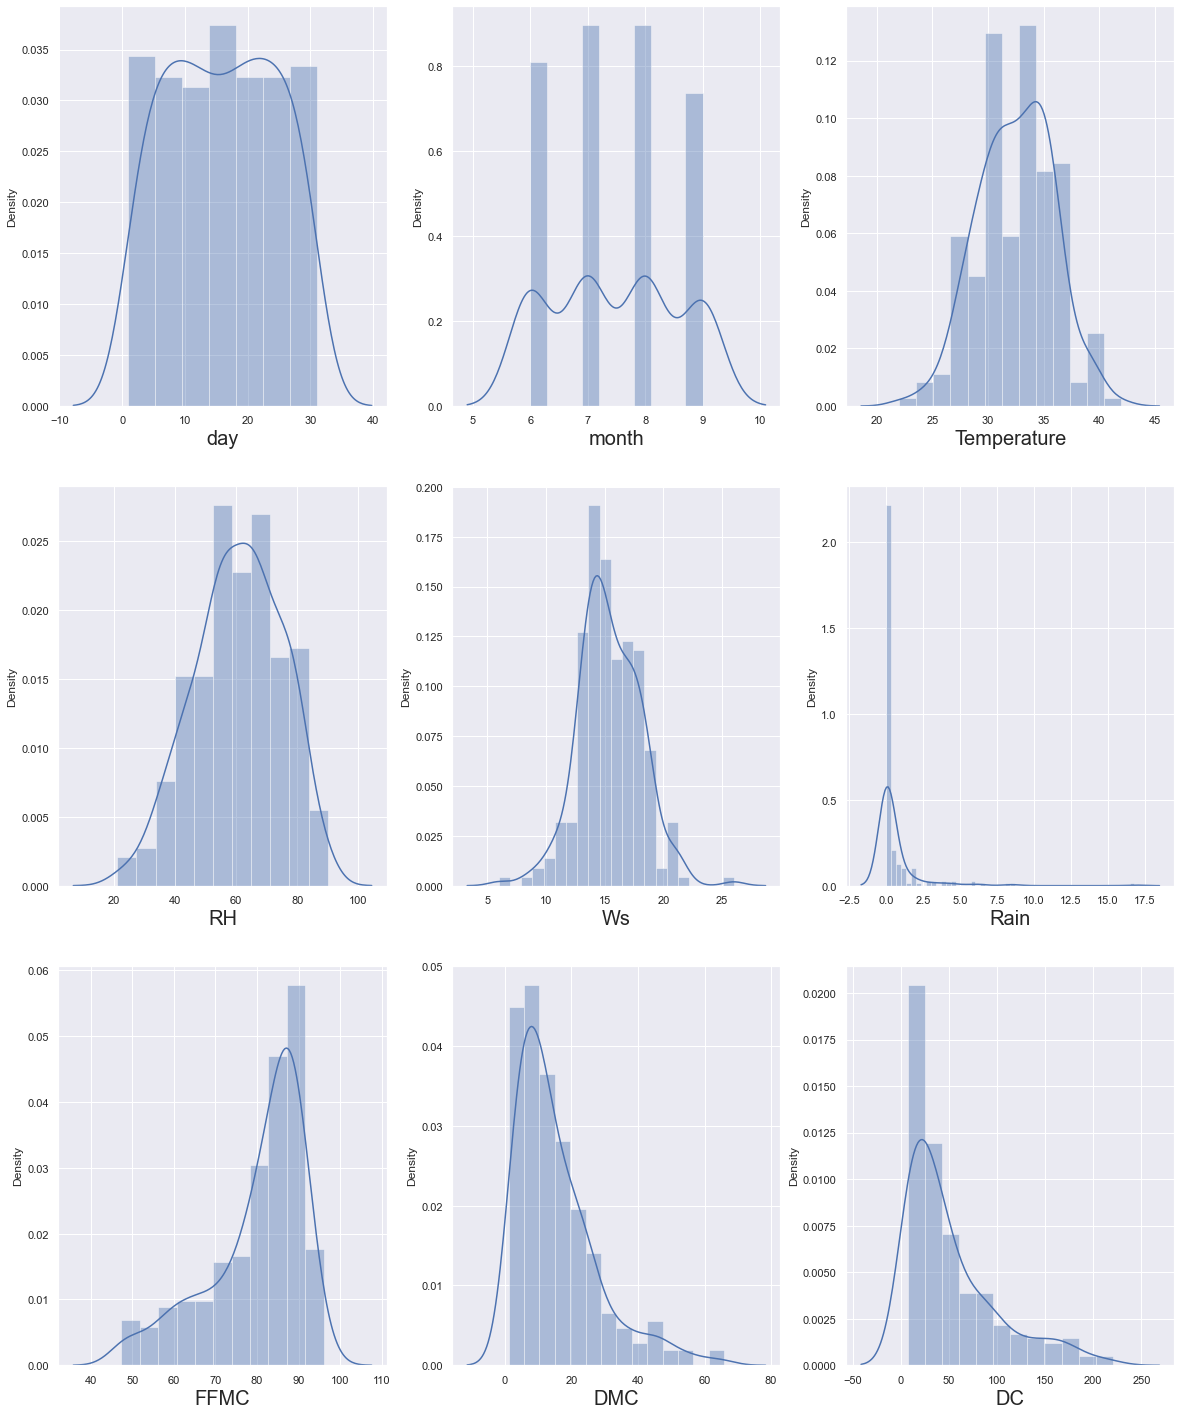

In [74]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data_cleaned[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [75]:
X = data_cleaned.drop(columns = ['Classes'])
y = data['Classes']

C:\Users\prasa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\prasa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\prasa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\prasa\anacond

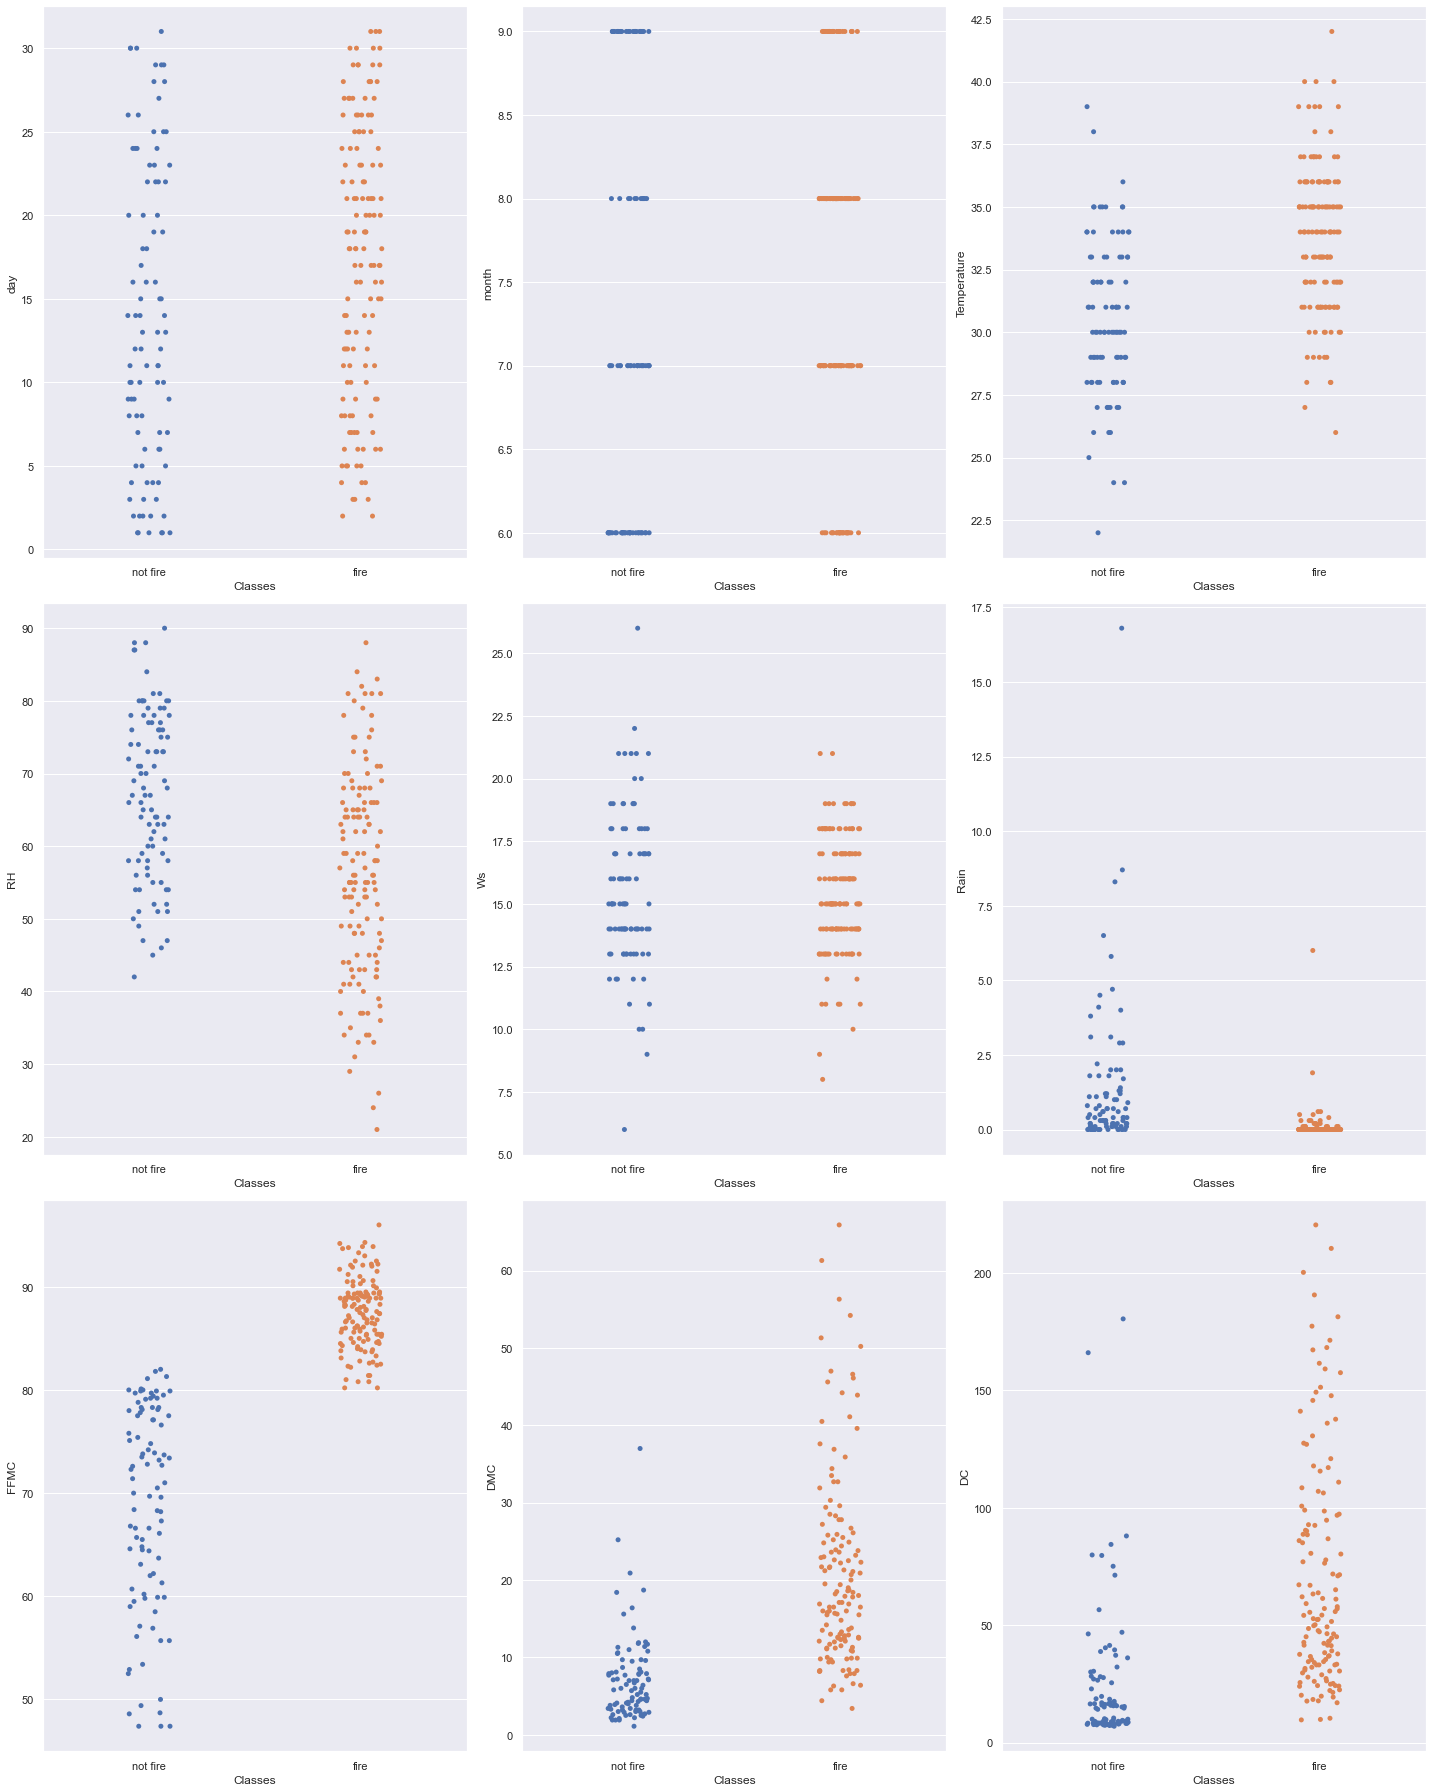

In [76]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

In [77]:
encoded_Classes=data['Classes'].replace({"fire":1,"not fire":0})

In [78]:
encoded_Classes

0      0
1      0
2      0
3      0
4      0
      ..
241    1
242    0
243    0
244    0
245    0
Name: Classes, Length: 244, dtype: int64

In [79]:
data_df=data.copy()

In [80]:
data.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,29,57,18,0.0,65.699997,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,29,61,13,1.3,64.400002,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,26,82,22,13.1,47.099998,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,25,89,13,2.5,28.600000,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,27,77,16,0.0,64.800003,3.0,14.2,1.2,3.9,0.5,not fire


In [81]:
data.drop(labels='Classes',axis=1,inplace=True)

In [82]:
data.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,1,6,29,57,18,0.0,65.699997,3.4,7.6,1.3,3.4,0.5
1,2,6,29,61,13,1.3,64.400002,4.1,7.6,1.0,3.9,0.4
2,3,6,26,82,22,13.1,47.099998,2.5,7.1,0.3,2.7,0.1
3,4,6,25,89,13,2.5,28.600000,1.3,6.9,0.0,1.7,0.0
4,5,6,27,77,16,0.0,64.800003,3.0,14.2,1.2,3.9,0.5


In [83]:
data['Classes']=encoded_Classes

In [84]:
data.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,29,57,18,0.0,65.699997,3.4,7.6,1.3,3.4,0.5,0
1,2,6,29,61,13,1.3,64.400002,4.1,7.6,1.0,3.9,0.4,0
2,3,6,26,82,22,13.1,47.099998,2.5,7.1,0.3,2.7,0.1,0
3,4,6,25,89,13,2.5,28.600000,1.3,6.9,0.0,1.7,0.0,0
4,5,6,27,77,16,0.0,64.800003,3.0,14.2,1.2,3.9,0.5,0


In [85]:
X=data.iloc[:,2:-1]
y=data.iloc[:,-1]

In [86]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,29,57,18,0.0,65.699997,3.4,7.6,1.3,3.4,0.5
1,29,61,13,1.3,64.400002,4.1,7.6,1.0,3.9,0.4
2,26,82,22,13.1,47.099998,2.5,7.1,0.3,2.7,0.1
3,25,89,13,2.5,28.600000,1.3,6.9,0.0,1.7,0.0
4,27,77,16,0.0,64.800003,3.0,14.2,1.2,3.9,0.5


In [87]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Classes, dtype: int64

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
print("X Training Shape is:",X_train.shape,"Y Training Shape is",y_train.shape)
print("X Testing Shape is:",X_test.shape,"Y Testing Shape is",y_test.shape)

X Training Shape is: (170, 10) Y Training Shape is (170,)
X Testing Shape is: (74, 10) Y Testing Shape is (74,)


In [90]:
## Standardize or feature scaling the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [91]:
scaler

StandardScaler()

In [92]:
X_train=scaler.fit_transform(X_train)

In [93]:
X_test=scaler.transform(X_test)

In [94]:
X_train.shape

(170, 10)

In [95]:
X_test.shape

(74, 10)

In [96]:
y_train.shape

(170,)

In [97]:
X_test.shape 

(74, 10)

In [98]:
from sklearn.linear_model import LogisticRegression

In [99]:
log_reg = LogisticRegression()

log_reg.fit(X_train,y_train)

LogisticRegression()

In [100]:
print("Logistic Regression Intercept:",log_reg.intercept_)
print("Logistic Regression Coefficient:",log_reg.coef_)

Logistic Regression Intercept: [1.69002568]
Logistic Regression Coefficient: [[ 0.06841065  0.3198905  -0.16376943  0.40238099  2.35811125  0.24060391
   0.14682464  2.2128341   0.19014022  1.7724979 ]]


In [101]:
print(log_reg.score(X_train,y_train))
print(log_reg.score(X_test,y_test))

0.9705882352941176
0.9459459459459459


In [102]:
y_pred = log_reg.predict(X_test)

In [103]:
y_pred

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [104]:
from sklearn.metrics import accuracy_score

In [105]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9459459459459459

In [106]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[33,  1],
       [ 3, 37]], dtype=int64)

In [107]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [108]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.9459459459459459

In [109]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.9705882352941176

In [110]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.9166666666666666

In [111]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9428571428571428